<a href="https://colab.research.google.com/github/rishabh107/Whitman-s-Library/blob/main/Mass_Spectroscopy_(M23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

# **Task 2**

# **Task 3**

### Task 3.1 - Cyclohexane

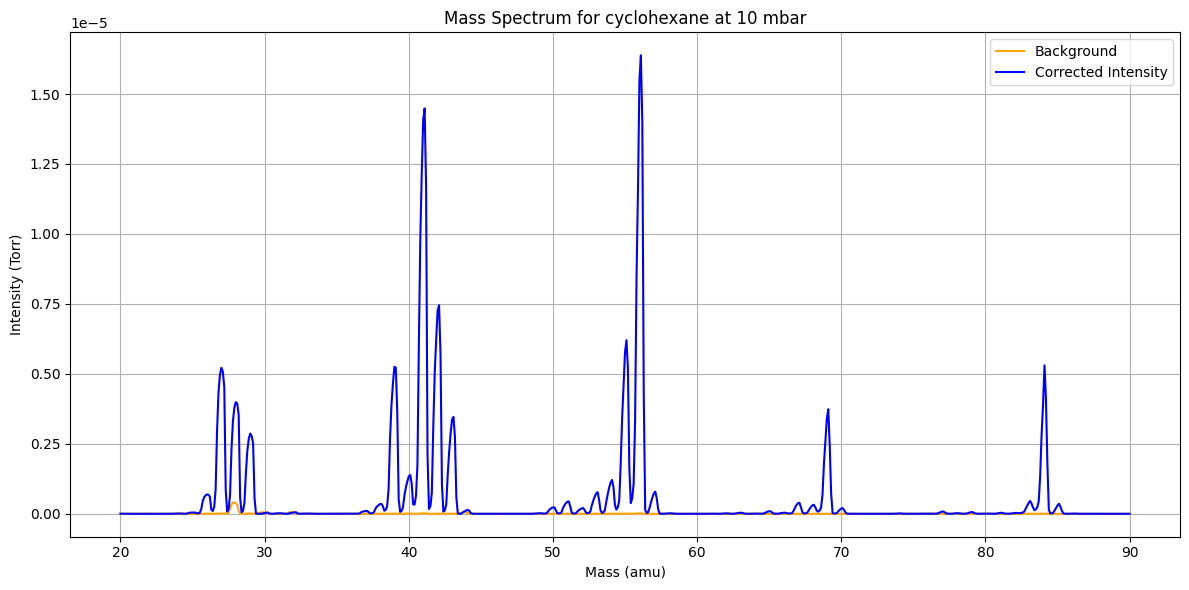

In [7]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

# URLs to the raw data
data_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%203/R1.txt"
background_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%203/background.txt"

# Function to parse data from a GitHub raw URL
def parse_data_from_url(url):
    response = requests.get(url)
    lines = response.text.splitlines()

    # Find the start of the data block
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.strip().startswith('20.00') or line.strip().startswith(' 1.00'):
            data_start_index = i
            break

    # Parse the actual mass-intensity pairs
    masses = []
    intensities = []
    for line in lines[data_start_index:]:
        parts = line.strip().split(',')
        if len(parts) >= 2:
            try:
                mass = float(parts[0])
                intensity = float(parts[1])
                masses.append(mass)
                intensities.append(intensity)
            except ValueError:
                continue
    return pd.DataFrame({'mass': masses, 'intensity': intensities})

# Load and parse both datasets
data_df = parse_data_from_url(data_url)
background_df = parse_data_from_url(background_url)

# Merge on mass values
merged_df = pd.merge(data_df, background_df, on='mass', how='inner', suffixes=('_data', '_background'))

# Calculate corrected intensity, clip negatives to zero
merged_df['corrected_intensity'] = (merged_df['intensity_data'] - merged_df['intensity_background']).clip(lower=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_df['mass'], merged_df['intensity_background'], color='orange', label='Background')
plt.plot(merged_df['mass'], merged_df['corrected_intensity'], color='blue', label='Corrected Intensity')
plt.xlabel('Mass (amu)')
plt.ylabel('Intensity (Torr)')
plt.title('Mass Spectrum for cyclohexane at 10 mbar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3.2 - Ethanol

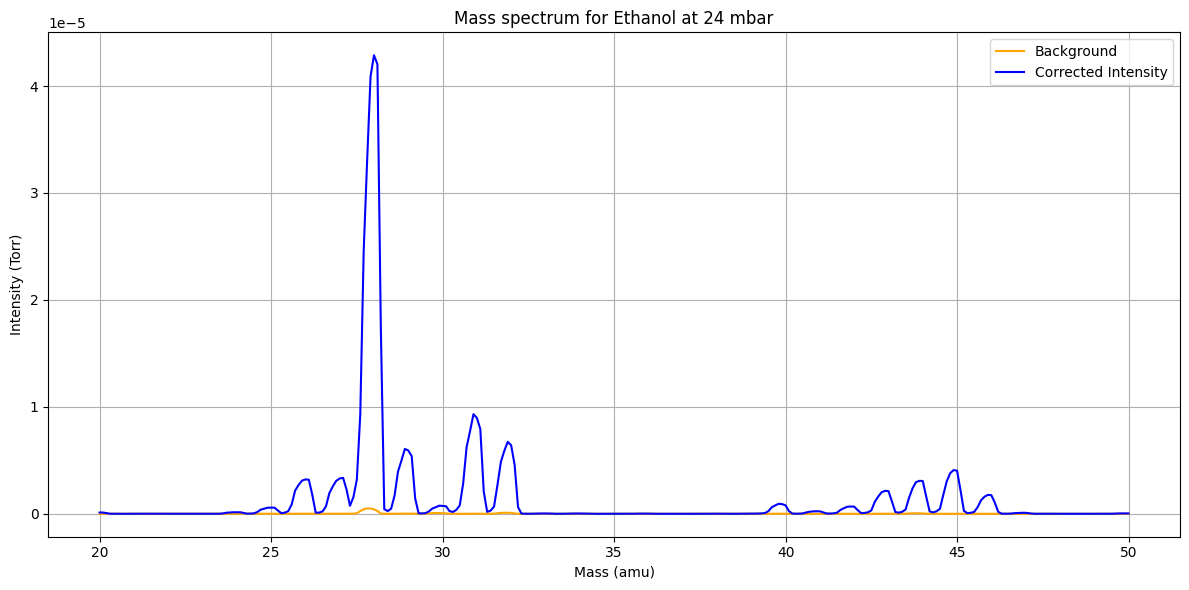

In [8]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import requests

# URLs for ethanol at 24 mbar
data_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/task%203.2/R1.txt"
background_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/task%203.2/background.txt"

# Function to parse data from GitHub
def parse_data_from_url(url):
    response = requests.get(url)
    lines = response.text.splitlines()

    data_start_index = 0
    for i, line in enumerate(lines):
        if line.strip().startswith('20.00') or line.strip().startswith(' 1.00'):
            data_start_index = i
            break

    masses = []
    intensities = []
    for line in lines[data_start_index:]:
        parts = line.strip().split(',')
        if len(parts) >= 2:
            try:
                mass = float(parts[0])
                intensity = float(parts[1])
                masses.append(mass)
                intensities.append(intensity)
            except ValueError:
                continue
    return pd.DataFrame({'mass': masses, 'intensity': intensities})

# Load data
data_df = parse_data_from_url(data_url)
background_df = parse_data_from_url(background_url)

# Merge and correct
merged_df = pd.merge(data_df, background_df, on='mass', how='inner', suffixes=('_data', '_background'))
merged_df['corrected_intensity'] = (merged_df['intensity_data'] - merged_df['intensity_background']).clip(lower=0)

# Filter for 10–50 amu
filtered = merged_df[(merged_df['mass'] >= 10) & (merged_df['mass'] <= 50)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(filtered['mass'], filtered['intensity_background'], color='orange', label='Background')
plt.plot(filtered['mass'], filtered['corrected_intensity'], color='blue', label='Corrected Intensity')
plt.xlabel('Mass (amu)')
plt.ylabel('Intensity (Torr)')
plt.title('Mass spectrum for Ethanol at 24 mbar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Task 4**

### Compound 1 - Sample 14 (unknown organic/inorganic compound)

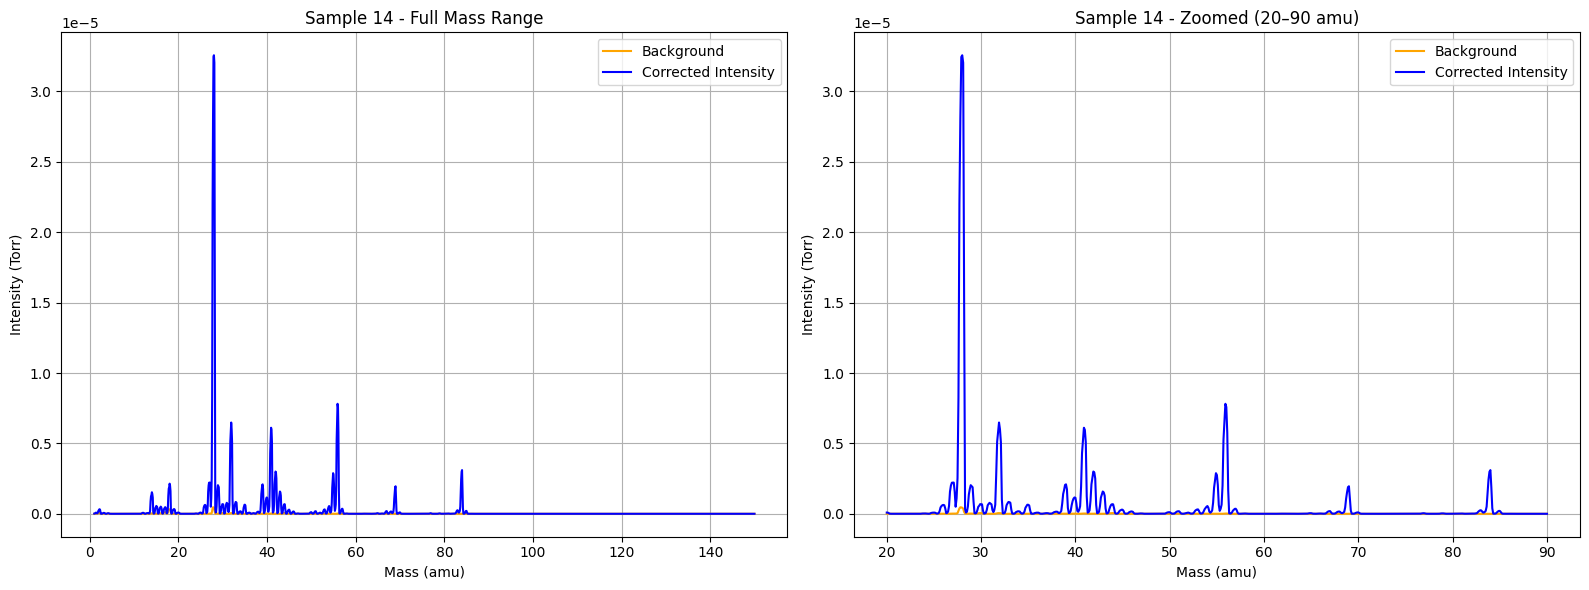

In [16]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import requests

# URLs for the unknown compound
data_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%204/R1.txt"
background_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%204/background.txt"

# Function to parse mass spec data from a URL
def parse_data_from_url(url):
    response = requests.get(url)
    lines = response.text.splitlines()

    # Find where numeric data begins
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.strip().replace('.', '', 1).replace('-', '', 1).replace('E', '', 1).replace('+', '', 1).replace(',', '').isdigit():
            data_start_index = i
            break

    masses = []
    intensities = []
    for line in lines[data_start_index:]:
        parts = line.strip().split(',')
        if len(parts) >= 2:
            try:
                mass = float(parts[0])
                intensity = float(parts[1])
                masses.append(mass)
                intensities.append(intensity)
            except ValueError:
                continue
    return pd.DataFrame({'mass': masses, 'intensity': intensities})

# Load data
data_df = parse_data_from_url(data_url)
background_df = parse_data_from_url(background_url)

# Merge data on mass values
merged_df = pd.merge(data_df, background_df, on='mass', how='inner', suffixes=('_data', '_background'))

# Compute corrected intensity and clip negatives to 0
merged_df['corrected_intensity'] = (merged_df['intensity_data'] - merged_df['intensity_background']).clip(lower=0)

# Filtered version for 20–90 amu
filtered_df = merged_df[(merged_df['mass'] >= 20) & (merged_df['mass'] <= 90)]

# Plotting side-by-side
plt.figure(figsize=(16, 6))

# Plot 1: Full mass range
plt.subplot(1, 2, 1)
plt.plot(merged_df['mass'], merged_df['intensity_background'], color='orange', label='Background')
plt.plot(merged_df['mass'], merged_df['corrected_intensity'], color='blue', label='Corrected Intensity')
plt.xlabel('Mass (amu)')
plt.ylabel('Intensity (Torr)')
plt.title('Sample 14 - Full Mass Range')
plt.legend()
plt.grid(True)

# Plot 2: Zoomed 20–90 amu
plt.subplot(1, 2, 2)
plt.plot(filtered_df['mass'], filtered_df['intensity_background'], color='orange', label='Background')
plt.plot(filtered_df['mass'], filtered_df['corrected_intensity'], color='blue', label='Corrected Intensity')
plt.xlabel('Mass (amu)')
plt.ylabel('Intensity (Torr)')
plt.title('Sample 14 - Zoomed (20–90 amu)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Compound 2 - Sample 16 (unknown organic/inorganic compound)

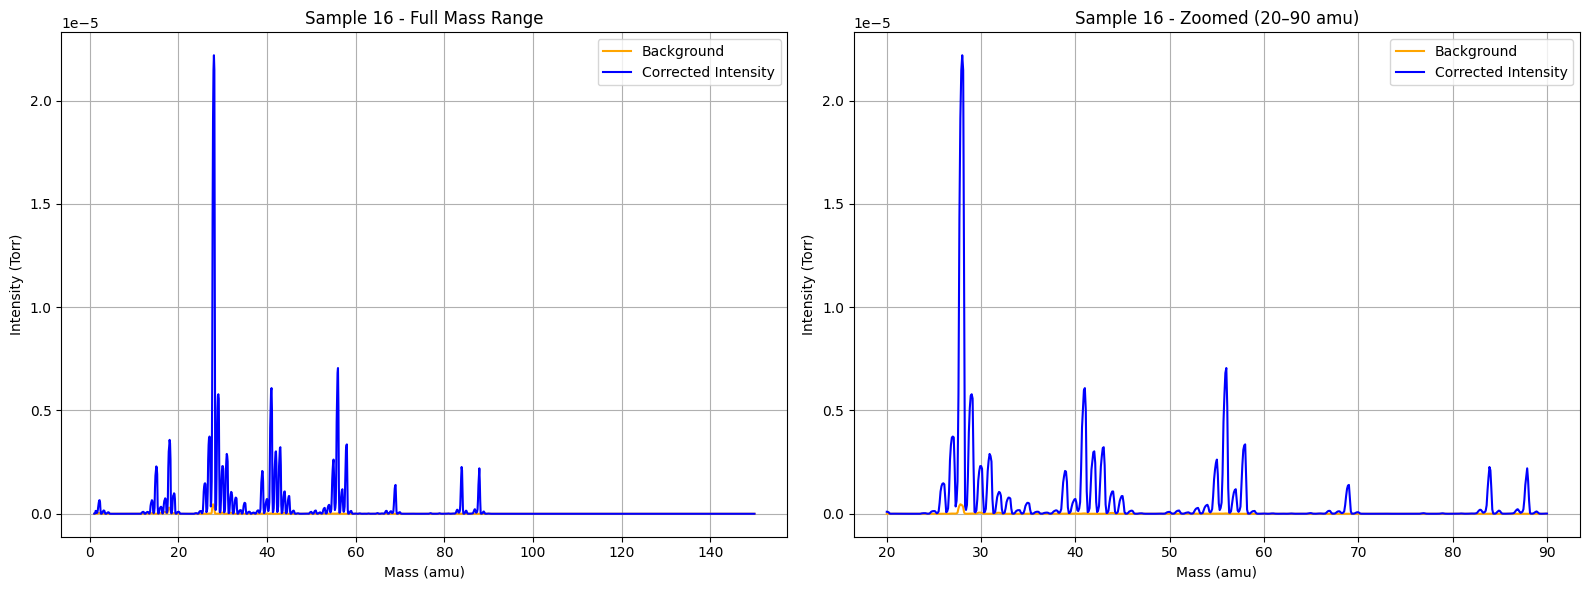

In [15]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import requests

# URLs for the unknown compound
data_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%204.2/R1.txt"
background_url = "https://raw.githubusercontent.com/rishabh107/Whitman-s-Library/refs/heads/main/M23/Task%204.2/background.txt"

# Function to parse mass spec data from a URL
def parse_data_from_url(url):
    response = requests.get(url)
    lines = response.text.splitlines()

    # Find where numeric data begins
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.strip().replace('.', '', 1).replace('-', '', 1).replace('E', '', 1).replace('+', '', 1).replace(',', '').isdigit():
            data_start_index = i
            break

    masses = []
    intensities = []
    for line in lines[data_start_index:]:
        parts = line.strip().split(',')
        if len(parts) >= 2:
            try:
                mass = float(parts[0])
                intensity = float(parts[1])
                masses.append(mass)
                intensities.append(intensity)
            except ValueError:
                continue
    return pd.DataFrame({'mass': masses, 'intensity': intensities})

# Load data
data_df = parse_data_from_url(data_url)
background_df = parse_data_from_url(background_url)

# Merge data on mass values
merged_df = pd.merge(data_df, background_df, on='mass', how='inner', suffixes=('_data', '_background'))

# Compute corrected intensity and clip negatives to 0
merged_df['corrected_intensity'] = (merged_df['intensity_data'] - merged_df['intensity_background']).clip(lower=0)

# Filtered version for 20–90 amu
filtered_df = merged_df[(merged_df['mass'] >= 20) & (merged_df['mass'] <= 90)]

# Plotting side-by-side
plt.figure(figsize=(16, 6))

# Plot 1: Full mass range
plt.subplot(1, 2, 1)
plt.plot(merged_df['mass'], merged_df['intensity_background'], color='orange', label='Background')
plt.plot(merged_df['mass'], merged_df['corrected_intensity'], color='blue', label='Corrected Intensity')
plt.xlabel('Mass (amu)')
plt.ylabel('Intensity (Torr)')
plt.title('Sample 16 - Full Mass Range')
plt.legend()
plt.grid(True)

# Plot 2: Zoomed 20–90 amu
plt.subplot(1, 2, 2)
plt.plot(filtered_df['mass'], filtered_df['intensity_background'], color='orange', label='Background')
plt.plot(filtered_df['mass'], filtered_df['corrected_intensity'], color='blue', label='Corrected Intensity')
plt.xlabel('Mass (amu)')
plt.ylabel('Intensity (Torr)')
plt.title('Sample 16 - Zoomed (20–90 amu)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
